Our imports for the project

In [ ]:
import numpy as np
import pandas as pd
import random
import math
import matplotlib.pyplot as plt


Mounting drive and importing data into a pandas dataframe

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

data_matrix = pd.read_csv('/content/drive/My Drive/CSC373_DMP_Mayr_Jack/DMP_Cluster_Analysis/Country-data.csv')
data_matrix

Mounted at /content/drive


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


Function for generating stats of our data by column

In [ ]:
def data_dict(data):
  data_stats = {}
  for (columnName, columnData) in data.iteritems():
    if columnName != 'country':
      col_stats = {}
      key = columnName
      avg_val = sum(columnData.values)/ len(data)
      std_dev = np.std(columnData.values)
      col_stats['Mean'] = avg_val
      col_stats['Std dev'] = std_dev
      data_stats[key] = col_stats
  return data_stats




    


Generating a dictionary with summary statistics for features

In [ ]:
init_dict = data_dict(data_matrix)

Generating our random centroids within 1.5 standard deviations of mean

In [ ]:
def gen_centroids(data_dict, k, data):
  centroids = pd.DataFrame(columns = data.columns.drop(['country']))
  for i in range(k):
    col_vals = []
    for j in centroids.columns:
    
      lower_bound = data_dict[j]['Mean'] - 1.5*data_dict[j]['Std dev']
      upper_bound = data_dict[j]['Mean'] + 1.5*data_dict[j]['Std dev']
      if lower_bound < 0:
        lower_bound = 0
      random_num = random.uniform(lower_bound, upper_bound)
      col_vals.append(random_num)
    centroids.loc[len(centroids)] = col_vals

  return centroids





Our centroids are stored in a dataframe.  We dropped non-numerical values because we cannot easily calculate distance between strings, and country name has little effect on the content of the data

In [ ]:
centroids_list = gen_centroids(init_dict, 5, data_matrix)
centroids_list

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,50.347091,65.499836,8.899582,60.096814,7488.701576,9.008303,76.210259,3.606580,4942.519786
1,29.609974,28.491187,8.433212,82.647168,2855.940584,18.052688,69.328586,1.354884,40008.761309
2,33.452880,28.143684,8.869830,18.730096,38802.072828,21.136081,76.081442,1.027941,24044.989134
3,17.050289,65.430216,5.100692,70.462622,40418.442122,18.478080,58.924057,3.092590,23154.618182
4,66.912376,72.549899,9.229800,72.264569,11175.004120,8.787628,77.349439,2.704909,21459.040266


From our created centroid list, we see which centroid is closest to each point in our data

In [ ]:
def label_nearest_centroid(centroids_list, data):
  data_for_dist = data.drop(columns = ['country'])
  #print(data_for_dist)
  centroid_dict = {'centroid_{}_df'.format(j):pd.DataFrame(columns = data.columns) for j in range(len(centroids_list))}
  for i in range(len(data)):
    data_point = list(data_for_dist.loc[i])
    min_cent_num = 0
    min_cent = centroids_list.loc[min_cent_num]
    min_dist = np.linalg.norm(min_cent-data_point)
    for j in range(1, len(centroids_list)):
      curr_cent_num = j
      curr_cent = centroids_list.loc[curr_cent_num]
      curr_dist = np.linalg.norm(curr_cent-data_point)
      if curr_dist < min_dist:
        min_dist = curr_dist
        min_cent = curr_cent
        min_cent_num = curr_cent_num
      
    #print(centroid_dict)
    centroid_dict['centroid_{}_df'.format(min_cent_num)].loc[len(centroid_dict['centroid_{}_df'.format(min_cent_num)])] = data.loc[i]
    
    


  return centroid_dict


Putting our labeling into action.  

In [ ]:
centroid_init_dict = label_nearest_centroid(centroids_list, data_matrix)
centroid_init_dict

{'centroid_0_df':          country  child_mort  exports  ...  life_expec  total_fer   gdpp
 0    Afghanistan        90.2     10.0  ...        56.2       5.82    553
 1        Albania        16.6     28.0  ...        76.3       1.65   4090
 2        Algeria        27.3     38.4  ...        76.5       2.89   4460
 3         Angola       119.0     62.3  ...        60.1       6.16   3530
 4      Argentina        14.5     18.9  ...        75.8       2.37  10300
 ..           ...         ...      ...  ...         ...        ...    ...
 108   Uzbekistan        36.3     31.7  ...        68.8       2.34   1380
 109      Vanuatu        29.2     46.6  ...        63.0       3.50   2970
 110      Vietnam        23.3     72.0  ...        73.1       1.95   1310
 111        Yemen        56.3     30.0  ...        67.5       4.67   1310
 112       Zambia        83.1     37.0  ...        52.0       5.40   1460
 
 [113 rows x 10 columns], 'centroid_1_df': Empty DataFrame
 Columns: [country, child_mort, ex

In [ ]:
def k_means(cent_point_dict, cent_points):
  updated_cent_points = pd.DataFrame(columns = cent_points.columns)
  for i in cent_point_dict:
    updated_cent_points.loc[len(updated_cent_points)] = cent_point_dict[i].mean(axis=0)

  return updated_cent_points
    

  



In [ ]:
new_points = k_means(centroid_init_dict, centroids_list)
new_points

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,52.399115,33.582292,6.299381,45.127132,6945.690265,9.311982,66.900885,3.460177,3312.513274
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8.250000,49.036667,9.633667,45.473333,37966.666667,2.546200,79.826667,1.878667,39700.000000
3,8.944444,92.655556,3.855556,65.211111,70444.444444,10.132667,78.055556,2.087778,43333.333333
4,9.466667,51.026667,6.845333,52.013333,20353.333333,5.315467,75.046667,1.744000,13980.000000


In [ ]:
new_cent_dict = label_nearest_centroid(new_points, data_matrix)
new_cent_dict

{'centroid_0_df':                 country  child_mort  exports  ...  life_expec  total_fer   gdpp
 0   Antigua and Barbuda        10.3     45.5  ...        76.8       2.13  12200
 1             Argentina        14.5     18.9  ...        75.8       2.37  10300
 2               Bahamas        13.8     35.0  ...        73.8       1.86  28000
 3               Bahrain         8.6     69.5  ...        76.0       2.16  20700
 4              Barbados        14.2     39.5  ...        76.7       1.78  16000
 5                 Chile         8.7     37.7  ...        79.1       1.88  12900
 6               Croatia         5.5     37.6  ...        76.3       1.55  13500
 7                Cyprus         3.6     50.2  ...        79.9       1.42  30800
 8        Czech Republic         3.4     66.0  ...        77.5       1.51  19800
 9     Equatorial Guinea       111.0     85.8  ...        60.9       5.21  17100
 10              Estonia         4.5     75.1  ...        76.0       1.72  14600
 11        

In [ ]:
init_centroids_list = gen_centroids(init_dict, 5, data_matrix)
init_cent_dict = label_nearest_centroid(init_centroids_list, data_matrix)
new_points = k_means(init_cent_dict, init_centroids_list)
updated_cent_dict = label_nearest_centroid(new_points, data_matrix)
updated_centroids_dist = np.linalg.norm(new_points-init_centroids_list)
iteration_count = 1
while(updated_centroids_dist > 0.1):
  old_points = new_points
  new_points = k_means(updated_cent_dict, init_centroids_list)
  new_cent_dict = label_nearest_centroid(new_points, data_matrix)
  updated_centroids_dist = sum(np.linalg.norm(new_points.values - old_points.values, axis=1))
  print(updated_centroids_dist)
  iteration_count+=1
  print(iteration_count)
  
print(new_points)
print(new_cent_dict)


37944.90816051544
2
0.0
3
   child_mort    exports     health  ...  life_expec  total_fer          gdpp
0    4.168421  51.000000  10.579474  ...   80.915789   1.781053  52905.263158
1   12.411765  59.694118   7.692941  ...   77.323529   1.915882  22576.470588
2   83.319231  25.980750   6.529231  ...   61.113462   4.568269   1008.538462
3    9.871429  84.200000   3.137143  ...   77.885714   2.142857  37757.142857
4   23.600000  40.847222   6.179861  ...   72.330556   2.407639   6378.750000

[5 rows x 9 columns]
{'centroid_0_df':            country  child_mort  exports  ...  life_expec  total_fer    gdpp
0        Australia         4.8     19.8  ...        82.0       1.93   51900
1          Austria         4.3     51.3  ...        80.5       1.44   46900
2          Belgium         4.5     76.4  ...        80.0       1.86   44400
3           Canada         5.6     29.1  ...        81.3       1.63   47400
4          Denmark         4.1     50.5  ...        79.5       1.87   58000
5         

In [ ]:
def Euclidean_Dist(df1, df2):
    return sum(np.linalg.norm(df1.values - df2.values,
                   axis=1))

In [ ]:
list_1 = pd.DataFrame([[1,1,1,1,1,1]])
list_2 = pd.DataFrame([[3,3,3,3,3,3]])
print(list_1)
print(Euclidean_Dist(list_1, list_2))
print(np.linalg.norm(list_1-list_2))

   0  1  2  3  4  5
0  1  1  1  1  1  1
4.898979485566356
4.898979485566356


Text(0.5, 1.0, 'gdpp vs health Scatterplot')

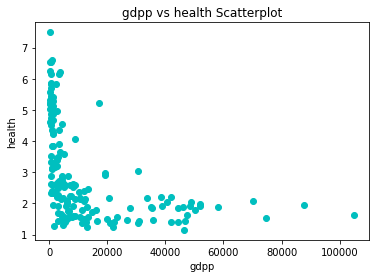

In [ ]:
plt.scatter(data_matrix['gdpp'], data_matrix['health'], color='c')
plt.xlabel('gdpp')
plt.ylabel('health')
plt.title('gdpp vs health Scatterplot')
#plt.savefig("/content/drive/My Drive/CSC373_DMP_Mayr_Jack/DMP_Cluster_Analysis/support_vs_confidence.png")
#files.download("/content/drive/My Drive/CSC373_DMP_Mayr_Jack/DMP_Association_Analysis/support_vs_confidence.png")

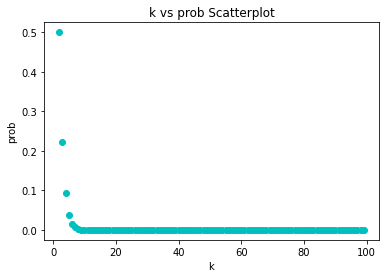

In [ ]:
single_initial_cluster = pd.DataFrame(columns = ['k','prob'])
for i in range(2,100):
  prob = math.factorial(i) / i**i
  row = [i, prob]
  single_initial_cluster.loc[len(single_initial_cluster)] = row
plt.scatter(single_initial_cluster['k'], single_initial_cluster['prob'], color='c')
plt.xlabel('k')
plt.ylabel('prob')
plt.title('k vs prob Scatterplot')

plt.savefig("/content/drive/My Drive/CSC373_DMP_Mayr_Jack/DMP_Cluster_Analysis/exercise4.png")